<a href="https://colab.research.google.com/github/EgorGod21/Comparison_detection_models/blob/main/Comparison_of_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [18]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os

In [32]:
output_yolo = './TestPhotoPredictYOLO'
output_ssd = './TestPhotoPredictSSD'
output_frcnn = './TestPhotoPredictFasterrcnn'
output_orig= './TestPhoto'

In [5]:
df_yolo = pd.read_csv(f'{output_yolo}/models_info.csv')
df_ssd = pd.read_csv(f'{output_ssd}/models_info.csv')
df_frcnn = pd.read_csv(f'{output_frcnn}/models_info.csv')

In [6]:
df = pd.concat([df_yolo, df_ssd, df_frcnn], ignore_index=True)
df

,Model,Image,Predicted Classes,Number of Objects
0,YOLO,1.jpg,{'car': 5},5
1,YOLO,2.jpg,"{'car': 2, 'truck': 1}",3
2,YOLO,3.jpg,{'car': 2},2
3,YOLO,4.jpg,{'car': 3},3
4,YOLO,5.jpg,"{'car': 5, 'truck': 1}",6
...,...,...,...,...
91,Faster-RCNN,28.jpg,"{'car': 14, 'traffic light': 5, 'person': 1, '...",21
92,Faster-RCNN,29.jpg,"{'car': 14, 'person': 4, 'traffic light': 1}",19
93,Faster-RCNN,30.jpg,"{'truck': 3, 'person': 5, 'car': 3, 'traffic l...",16
94,Faster-RCNN,31.jpg,"{'car': 7, 'kite': 1}",8


In [7]:
df.groupby('Model').agg({'Number of Objects':'mean'})

,Number of Objects
Model,
Faster-RCNN,13.90625
SDD,2.46875
YOLO,5.28125


<ipython-input-8-af7f9da1dd84>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='Number of Objects', data=df, ci=None, palette=colors.values())


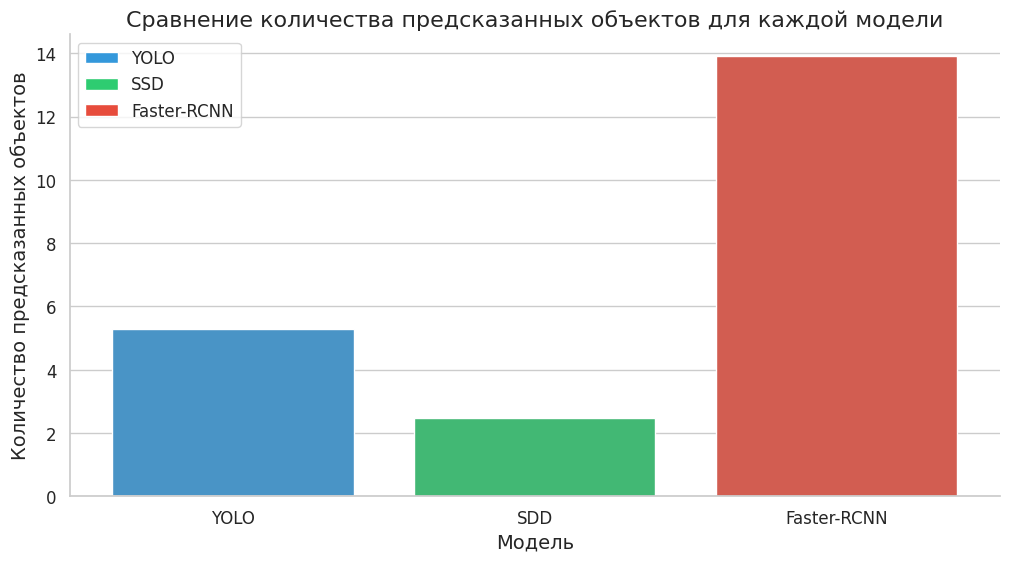

In [8]:
sns.set(style="whitegrid")

colors = {'YOLO': '#3498db', 'SSD': '#2ecc71', 'Faster-RCNN': '#e74c3c'}

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Number of Objects', data=df, ci=None, palette=colors.values())
plt.title('Сравнение количества предсказанных объектов для каждой модели', fontsize=16)
plt.xlabel('Модель', fontsize=14)
plt.ylabel('Количество предсказанных объектов', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for model, color in colors.items():
    plt.bar(0, 0, color=color, label=model)

plt.legend(fontsize=12)
sns.despine()
plt.show()

In [9]:
df_yolo_time = pd.read_csv(f'{output_yolo}/models_time.csv')
df_ssd_time = pd.read_csv(f'{output_ssd}/models_time.csv')
df_frcnn_time = pd.read_csv(f'{output_frcnn}/models_time.csv')

In [10]:
df_time = pd.concat([df_yolo_time, df_ssd_time, df_frcnn_time], ignore_index=True)
df_time

,Model,Inference_Time_GPU,Inference_Time_CPU
0,YOLO,0.019627,0.213290
1,SDD,0.014433,0.063911
2,Faster-RCNN,0.121120,6.160308


In [11]:
df_time['Inference_Time_GPU'] *= 1000
df_time['Inference_Time_CPU'] *= 1000

In [12]:
df_time

,Model,Inference_Time_GPU,Inference_Time_CPU
0,YOLO,19.626617,213.289976
1,SDD,14.432857,63.910578
2,Faster-RCNN,121.119905,6160.308290


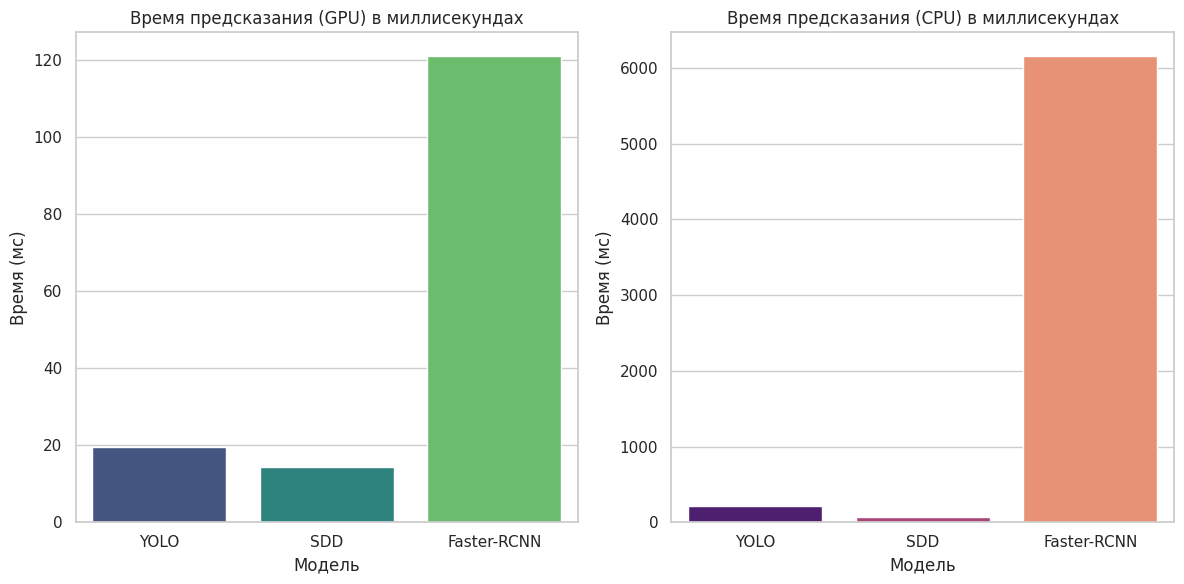

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Inference_Time_GPU', data=df_time, palette='viridis')
plt.title('Время предсказания (GPU) в миллисекундах')
plt.xlabel('Модель')
plt.ylabel('Время (мс)')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Inference_Time_CPU', data=df_time, palette='magma')
plt.title('Время предсказания (CPU) в миллисекундах')
plt.xlabel('Модель')
plt.ylabel('Время (мс)')

plt.tight_layout()
plt.show()

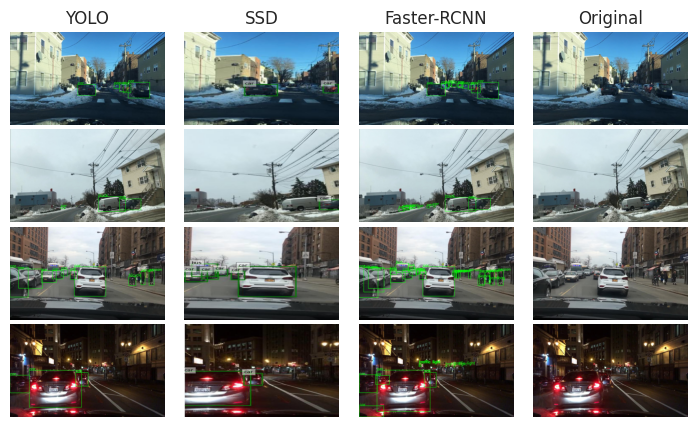

In [48]:
output_paths = [output_yolo, output_ssd, output_frcnn, output_orig]
output_labels = ['YOLO', 'SSD', 'Faster-RCNN', 'Original']

photos_arr = ['1.jpg', '2.jpg', '23.jpg', '13.jpg']

fig, axes = plt.subplots(nrows=len(photos_arr), ncols=len(output_paths), figsize=(9, 5))

for j, i in enumerate(photos_arr):
    for ax, path, label in zip(axes[j], output_paths, output_labels):
        image_path = os.path.join(path, i)
        img = Image.open(image_path)

        # Изменяем размер изображения
        img = img.resize((500, 300))

        ax.imshow(img)
        if j == 0:
            ax.set_title(label)
        ax.axis('off')

plt.subplots_adjust(wspace=0.0, hspace=0.05)
plt.savefig('comparison_photo', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

